begin...
stop


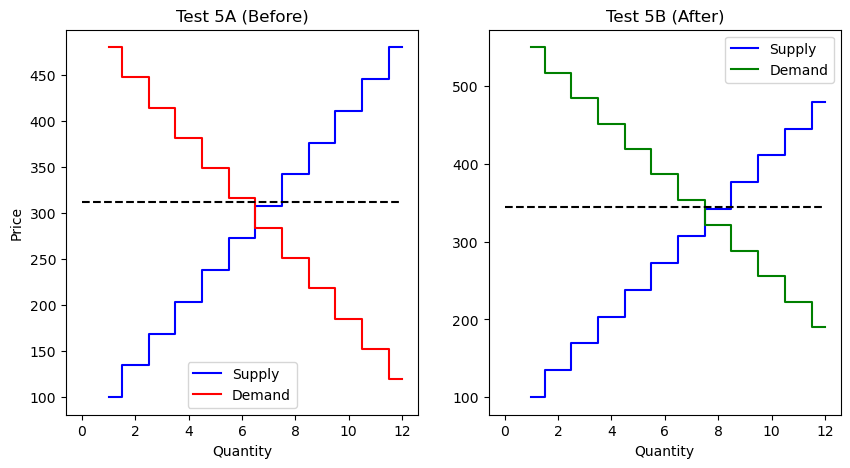

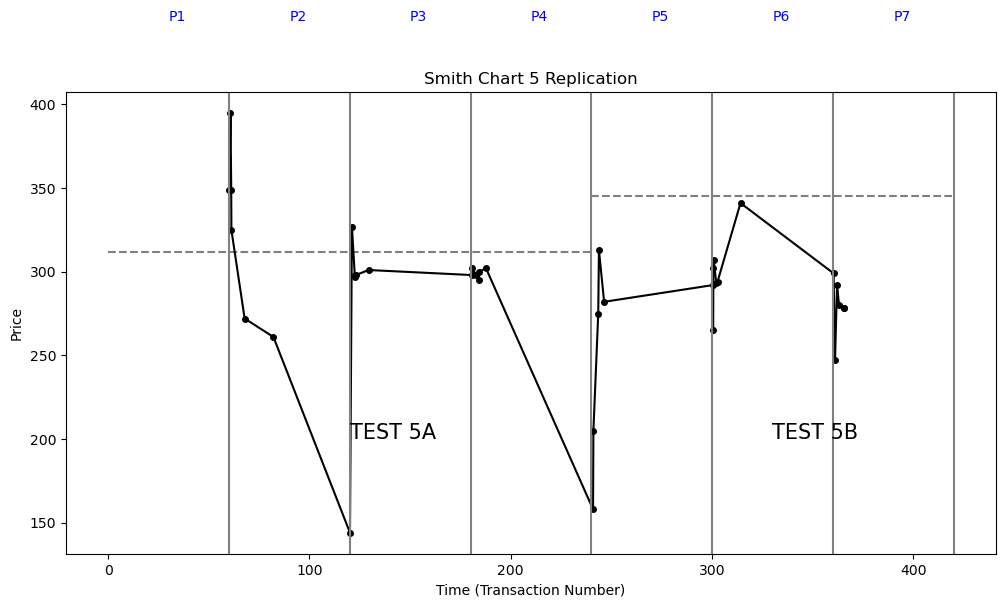

In [5]:
import BSE
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

t_period = 60
end_5a = 4 * 60
total_time = 7 * 60

b_list = []
b_list.append(('ZIP', 4))
b_list.append(('SHVR', 4))
b_list.append(('ZIC', 4))

s_list = []
s_list.append(('ZIP', 4))
s_list.append(('SHVR', 4))
s_list.append(('ZIC', 4))

traders = {'sellers': s_list, 'buyers': b_list}

range_s = (100, 480)
range_d1 = (480, 120)
range_d2 = (550, 190)

sup_sch = [{'from': 0, 'to': total_time, 'ranges': [range_s], 'stepmode': 'fixed'}]

dem_sch = []
dem_sch.append({'from': 0, 'to': end_5a, 'ranges': [range_d1], 'stepmode': 'fixed'})
dem_sch.append({'from': end_5a, 'to': total_time, 'ranges': [range_d2], 'stepmode': 'fixed'})

order_s = {
    'sup': sup_sch,
    'dem': dem_sch,
    'interval': t_period,
    'timemode': 'periodic'
}

sess_id = 'q2_exp_run'
dump = {'dump_blotters': False, 'dump_lobs': False, 'dump_strats': False, 
        'dump_avgbals': False, 'dump_tape': True}

print("begin...")
BSE.market_session(sess_id, 0, total_time, traders, order_s, dump, False)
print("stop")

x_axis = []
for i in range(1, 13):
    x_axis.append(i)

s_p = []
step_s = (480 - 100) / 11
for i in range(12):
    p = 100 + i * step_s
    s_p.append(p)

d_p1 = []
step_d1 = (480 - 120) / 11
for i in range(12):
    p = 480 - i * step_d1
    d_p1.append(p)

d_p2 = []
step_d2 = (550 - 190) / 11
for i in range(12):
    p = 550 - i * step_d2
    d_p2.append(p)

eq1 = 312
eq2 = 345

plt.figure(1, figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.step(x_axis, s_p, where='mid', label='Supply', color='b')
plt.step(x_axis, d_p1, where='mid', label='Demand', color='r')

plt.plot([0, 12], [eq1, eq1], 'k--')
plt.title('Test 5A (Before)')
plt.xlabel('Quantity')
plt.ylabel('Price')
plt.legend()

plt.subplot(1, 2, 2)
plt.step(x_axis, s_p, where='mid', label='Supply', color='b')
plt.step(x_axis, d_p2, where='mid', label='Demand', color='g')
plt.plot([0, 12], [eq2, eq2], 'k--')
plt.title('Test 5B (After)')
plt.xlabel('Quantity')
plt.legend()

plt.savefig('q2_fig1.png')
plt.show()

df = pd.read_csv(sess_id + '_tape.csv', header=None)
df = df[df[0] == 'Trd']
times = df[1].values
prices = df[2].values

plt.figure(2, figsize=(12, 6))
plt.plot(times, prices, 'ko-', markersize=4)
plt.plot([0, end_5a], [eq1, eq1], 'k--', alpha=0.5)
plt.plot([end_5a, total_time], [eq2, eq2], 'k--', alpha=0.5)

for i in range(1, 8):
    t_line = i * 60
    plt.axvline(x=t_line, color='gray')
    plt.text(t_line - 30, 450, 'P'+str(i), color='blue')

plt.text(120, 200, 'TEST 5A', fontsize=15)
plt.text(330, 200, 'TEST 5B', fontsize=15)

plt.xlabel('Time (Transaction Number)')
plt.ylabel('Price')
plt.title('Smith Chart 5 Replication')

plt.savefig('q2_fig2.png')
plt.show()